<a href="https://colab.research.google.com/github/vibhuverma17/60-DAY-LLM/blob/main/TS_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CHARACTERISTICS OF TS DATA
- Cronological Order: Regular Interval
- Sequential Order: Sequenc of Data (some relation to the past)
- Temporal COmponents
  - Trend
  - Seasonality
  - Cycle
  - Noise
- Constant Frequency: Continuous Data, without any missing values
Dynamic Nature: Many external factors impact the TS data

TS analysis: Statistical techniques to extract meaningful insights regarding trends and patterns
- undestanding past behavious
- forecasting future

Time Series Decomposition/Components
- Trend: Long Term Direction
- Seasonality: Pattern that repeats at fixed intervals
- Cyclical: Pattern but not at fixed intervals
  - Economic Cycle
  - Business Cycle
- Noise/Residuals: Sudden random fluctuation in the data


Types of Decomposition:
What would give us the final results, adding or multiplying TS Components.
- Additive:
- Multiplicative

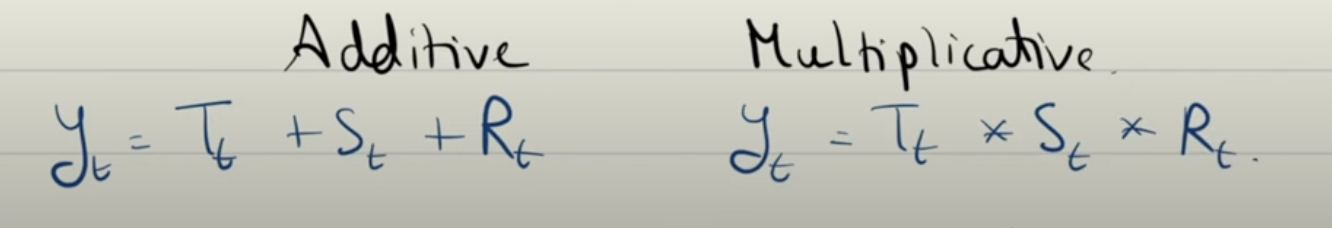

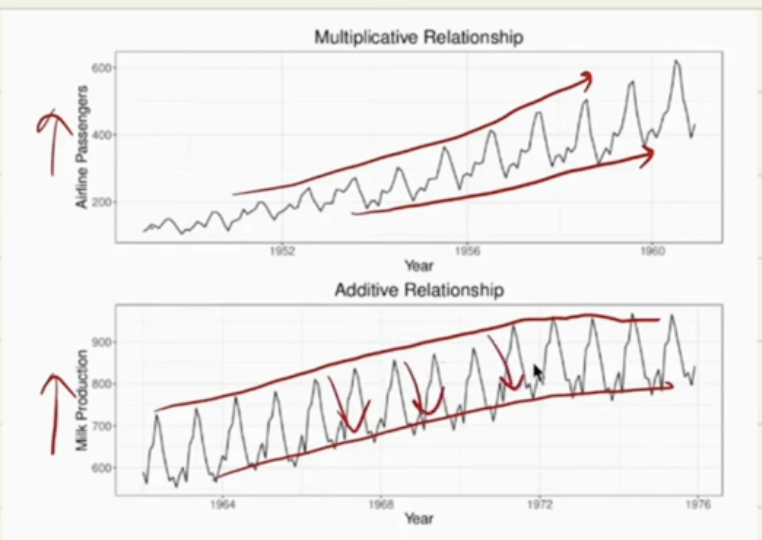

In [1]:
#!pip install yfinance matplotlib

import yfinance as yf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Download Apple stock data starting from 2024
data = yf.download("AAPL", start="2024-01-01")

# Print the first few rows of the data
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.532074,187.315366,182.792518,186.033057,82488700
2024-01-03,183.150375,184.770652,182.335262,183.120556,58414500
2024-01-04,180.824356,181.997307,179.800504,181.062914,71983600
2024-01-05,180.098694,181.669266,179.094727,180.903872,62303300
2024-01-08,184.452560,184.492330,180.416793,181.003268,59144500


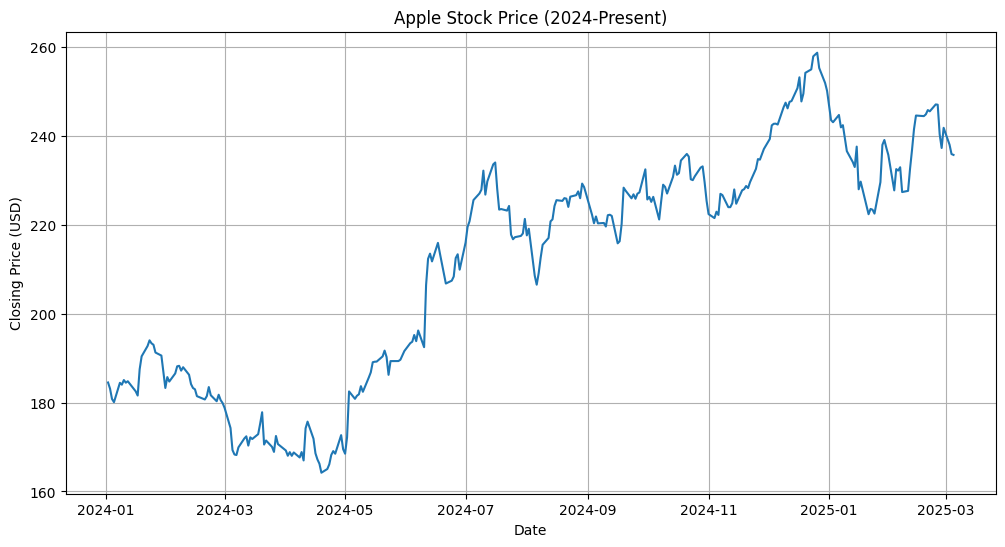

In [2]:
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('Apple Stock Price (2024-Present)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

### CLASSICAL TIME SERIES DECOMPOSITION

- Assumes fixed seasonal patterns in the data
- Easily influenced by outliers
- Can handle both multiplicative and additive models

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive = seasonal_decompose(data['Close'], model='additive', period=30) # THIS IS THE PERIOD WE WANT TO USE, 30 = DAILY
# decomposition_multiplicative = seasonal_decompose(data['Close'], model='multiplicative')

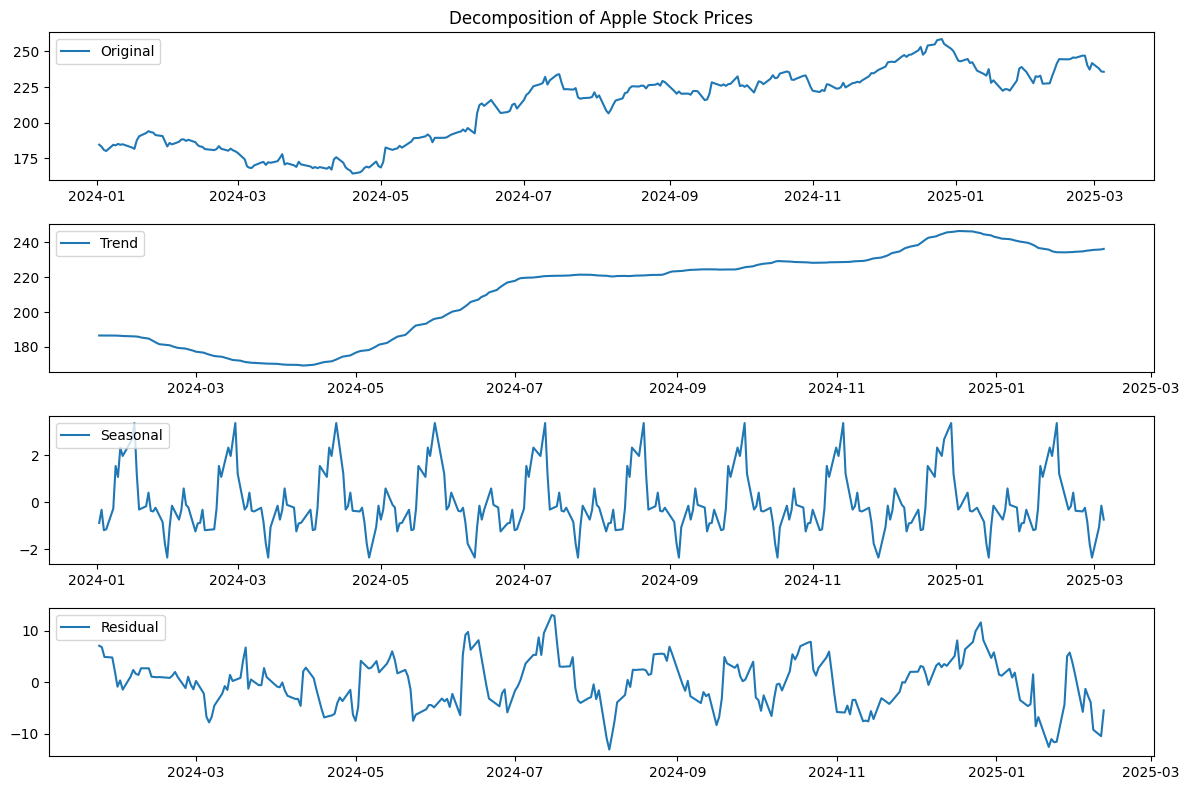

In [4]:
# Plot the original data
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Decomposition of Apple Stock Prices')

# Plot the trend component
plt.subplot(412)
plt.plot(decomposition_additive.trend, label='Trend')
plt.legend(loc='upper left')


# Plot the seasonal component
plt.subplot(413)
plt.plot(decomposition_additive.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# Plot the residual component
plt.subplot(414)
plt.plot(decomposition_additive.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### STL DECOMPOSITION USING LOESS METHOD
- LOESS = Locally estimated scatterplot smoothing
- Can handle outliers
- Only handle additive TS Data
- Finds actual/variety of seasonal patterns

In [7]:
from statsmodels.tsa.seasonal import STL

# STL Decomposition
stl = STL(data['Close'], period=30)
res = stl.fit()

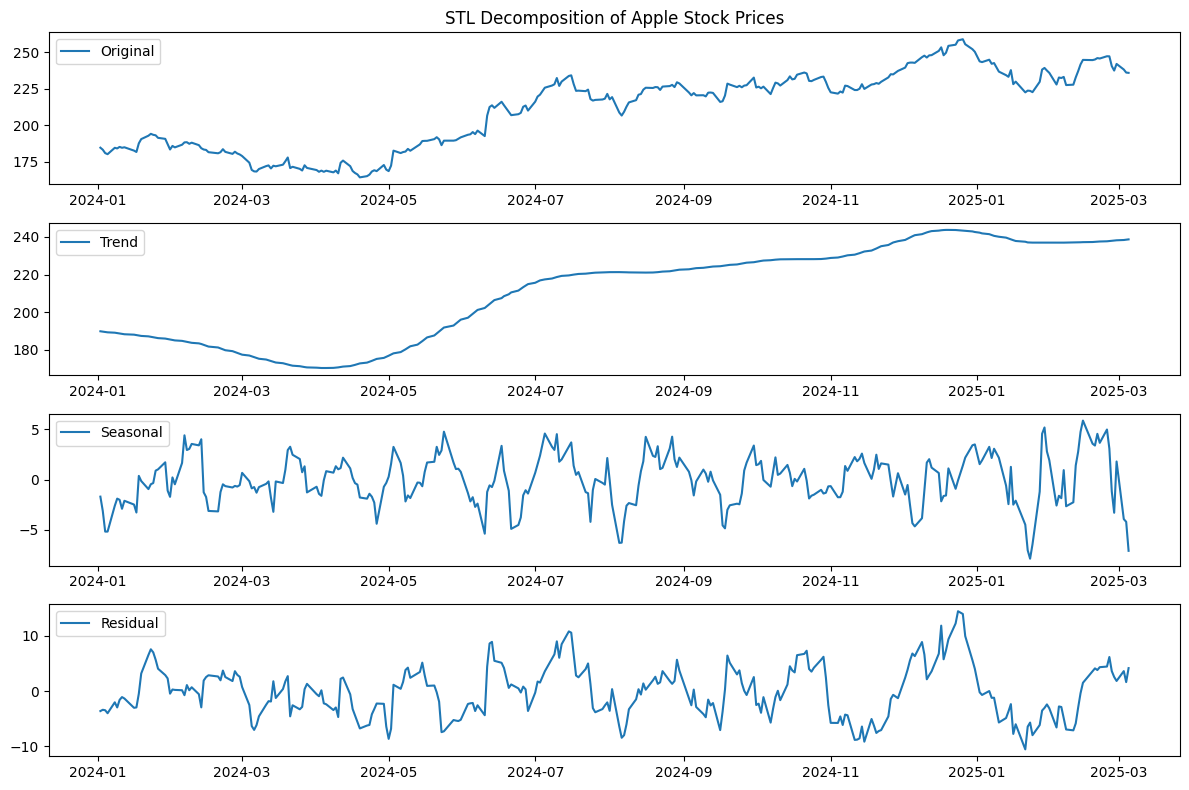

In [8]:
# Plot the STL decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Close'], label='Original')
plt.legend(loc='upper left')
plt.title('STL Decomposition of Apple Stock Prices')

plt.subplot(412)
plt.plot(res.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(res.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(res.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### STATIONARITY

- mean, variance and autocorelation is constant over time
- autocorelation = corelation of a point at point t with point t-n where n is the lag
- Why do we need stationarity?
  - We are trying to predict statistical properties on future data which should be similar to the past data
- We need this for future forecasting, as we assume same properties throughout the time
- ARIMA/ SARIMA assume requires stationarity

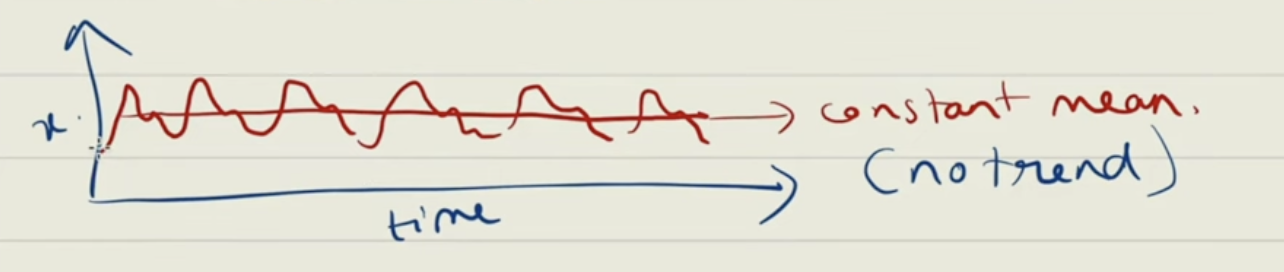

### TYPES OF STATIONARITY

- Weak Stationarity
  - Constant mean, variable and auto correlation

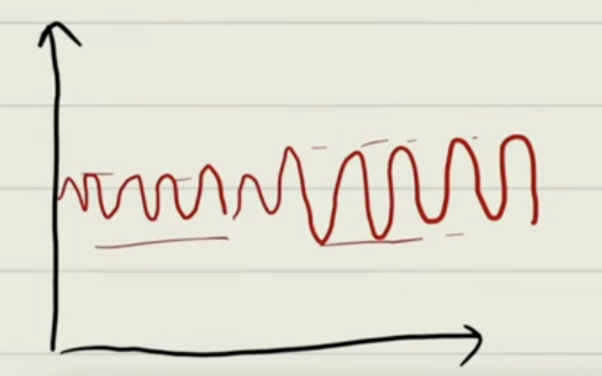

- Strict Stationarity
  - Properties of weak stationarity
  - Joint distribution remains unchanged when shifted along any time period IMPORTANT

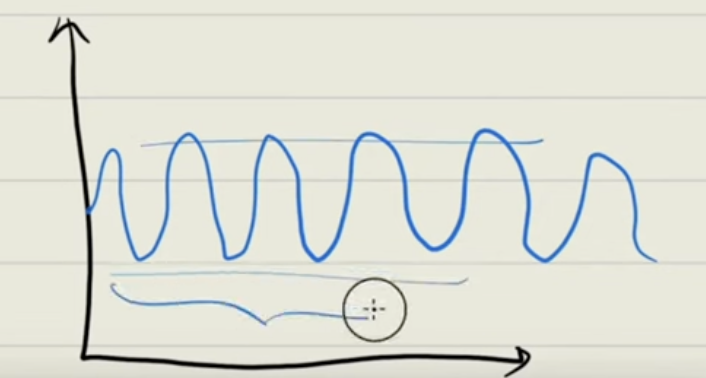

A time series model for which all joint distributions are invariant to shifts in time is called strictly stationary.

Formally, this means that for any collection of times (t1,t2,…,tK)
, the joint distribution of observations at these times should be the same as the joint distribution at (t1+τ,t2+τ,…,tK+τ)
 for any τ
.

For equally spaced observations, this becomes: for any collection of timepoints n1,…,nK
, and for any lag h
, the joint density function of (Yn1,Yn2,…,YnK)
 is the same as the joint density function of (Yn1+h,Yn2+h,…,YnK+h)
.

In our general notation for densities, this strict stationarity requirement can be written as
fYn1,Yn2,…,YnK(y1,y2,…,yK)=fYn1+h,Yn2+h,…,YnK+h(y1,y2,…,yK).

**Strict stationarity implies weak stationarity (check this)**. Note that we only defined weak stationarity for equally spaced observations.


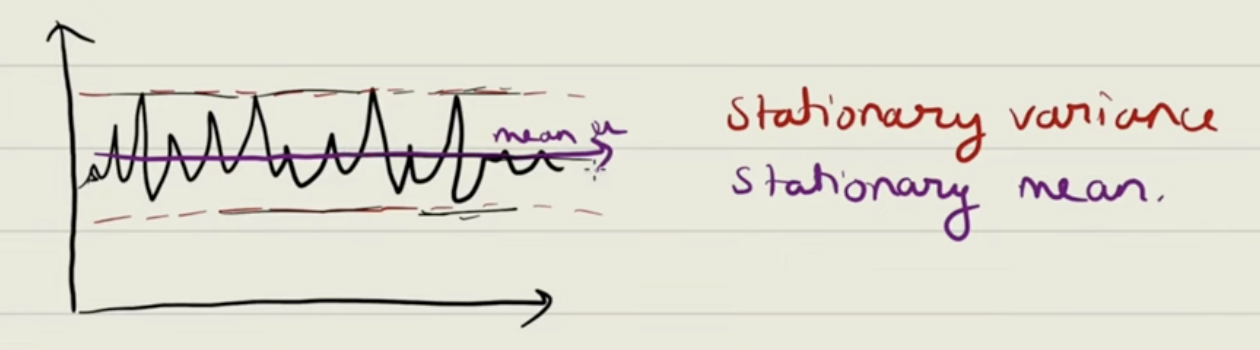

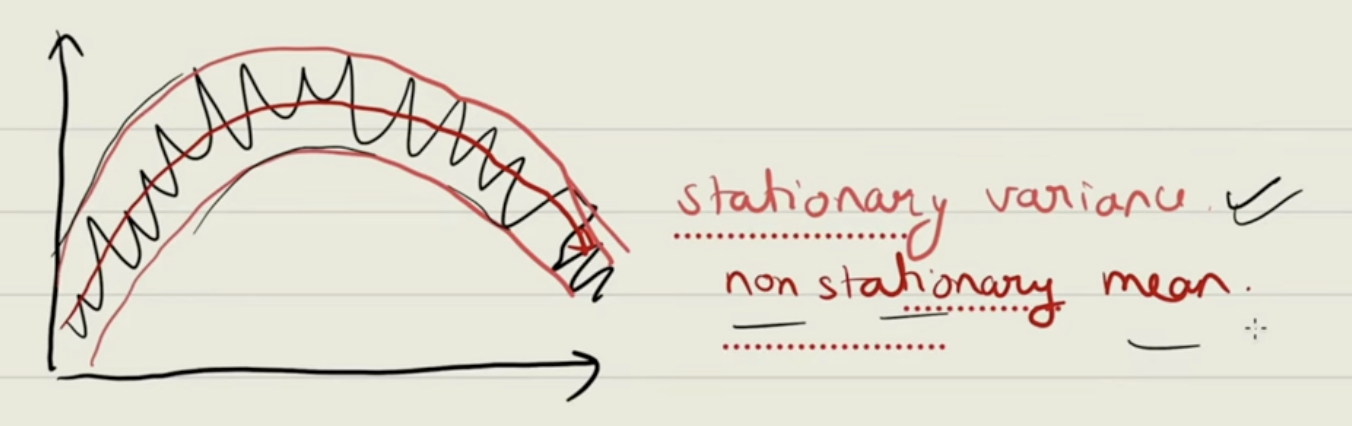

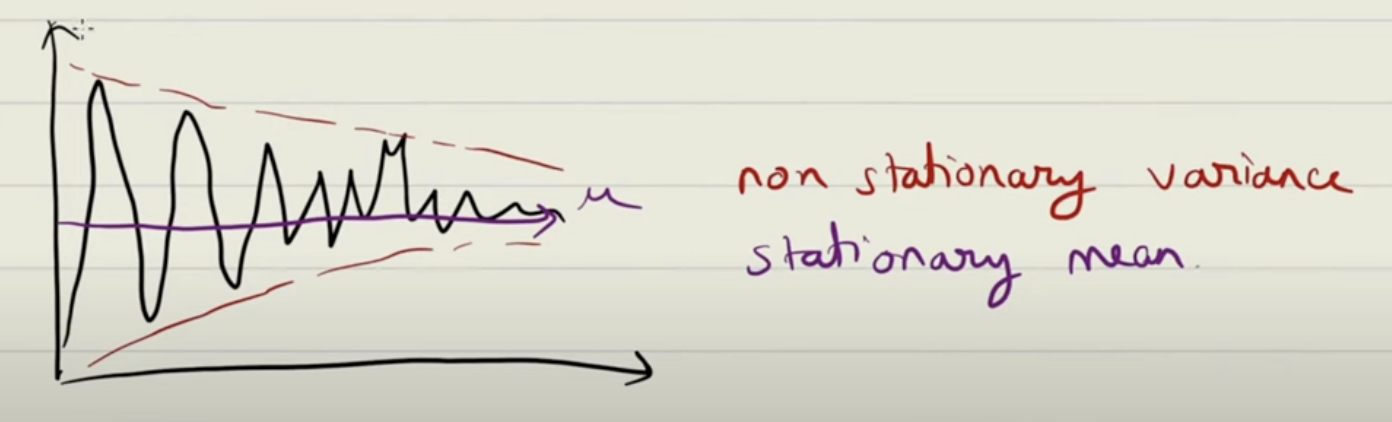

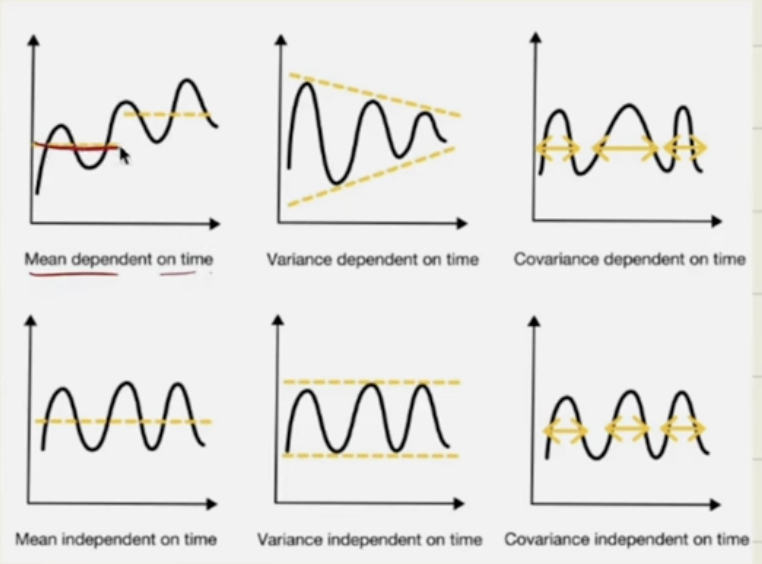

## FORECASTING MODELS AND TS MODELS:

- For forecasting shorter span: Weak Stationarity
- For Modeling longer distribution of data : Strict Stationary


### TESTING FOR STATIONARY
- Weak Stationary Test:
  - ADF Test:
    - If a unit root is present in the data
    - Unit Root: non stationary trend
      - Null hypothesis: Data has a unit root
      - Alternate hypothesis: Stationary Data
    - Decision Criteria: p-value< significance level (0.05) then data is stationary
    - ADF Statistic < Critical Value - Reject Null Value
  - KPSS Test:
    - Fit a constant mean model on the data
    - Measures the variance of cummulative sum of the variance
      - Null Hypothesis: Stationary
      - Alternate Hypothesis - Non Stationary
    - Decision Criteria: p-value < significance (0.05) non-stationary
    - KPSS Statistic > Critical Value then also non stationary


**Good to do both the tests to make sure we have weak stationarity**

- Strict Stationarity: Strict encompasses Weak stationarity
  - KS Test:
    - Compares the cummulative distribution functions of two samples
    - This test checks how similar two distributions are—whether a sample of data fits a specific distribution (like normal distribution) or if two samples are from the same distribution.
    - Decision Criteria: p > significance level 0.05 then there is no difference in distributions i.e., the data is strict stationary

